In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
from keras.models import load_model
import numpy as np
import joblib
# 加载训练好的模型
model_path = "/content/drive/MyDrive/reTesla chip/trained_dt_model_2024-07-08_08-57-54.joblib"
model = joblib.load(model_path)

# 输入7个随机数值进行预测
random_input = np.array([[9, 50, 0.1, 0.4, 0.1, 0.15, 0.1]])  # 替换为实际的随机数值
predicted_output = model.predict(random_input)
print(f"Predicted Output: {predicted_output[0]}")


Predicted Output: 67.74815066065574


In [22]:
#trained_model_2024-07-09_10-16-08.joblib
from keras.models import load_model
import numpy as np
import joblib
# 加载训练好的模型
model_path = "/content/drive/MyDrive/reTesla chip/trained_vr_model_finetuned_2024-07-10_10-55-09.joblib"
model = joblib.load(model_path)

# 输入7个随机数值进行预测
random_input = np.array([[9, 50, 0.1, 0.2, 0.1, 0.25, 0.05]])  # 替换为实际的随机数值
predicted_output = model.predict(random_input)
print(f"Predicted Output: {predicted_output[0]}")


Predicted Output: 86.49628376964637


Files with the largest prediction errors and their parameter combinations:
                                             Filename  Cycle  Theta    R1  \
0   F:/comsol_0522_ncheng/image/u7_v_3500x1500/u7_...    7.0   20.0  0.20   
1   F:/comsol_0522_ncheng/image/image_zuijia_24061...    7.0   50.0  0.20   
2   F:/comsol_0522_ncheng/image/image_zuijia_24061...    5.0   50.0  0.10   
3   F:/comsol_0522_ncheng/image/image_zuijia_24061...    7.0   50.0  0.10   
4   F:/comsol_0522_ncheng/image/image_zuijia_24061...    5.0   50.0  0.20   
5   F:/comsol_0522_ncheng/image/image_zuijia_24061...    3.0   50.0  0.20   
6   F:/comsol_0522_ncheng/image/image_zuijia_24061...    7.0   50.0  0.15   
7   F:/comsol_0522_ncheng/image/image_zuijia_24061...    7.0   70.0  0.25   
8   F:/comsol_0522_ncheng/image/u9_v_4000x1500/u9_...    9.0   20.0  0.15   
9   F:/comsol_0522_ncheng/image/image_zuijia_24061...    5.0   50.0  0.10   
10  F:/comsol_0522_ncheng/image/image_zuijia_24061...    9.0   50.0  0.10   
1

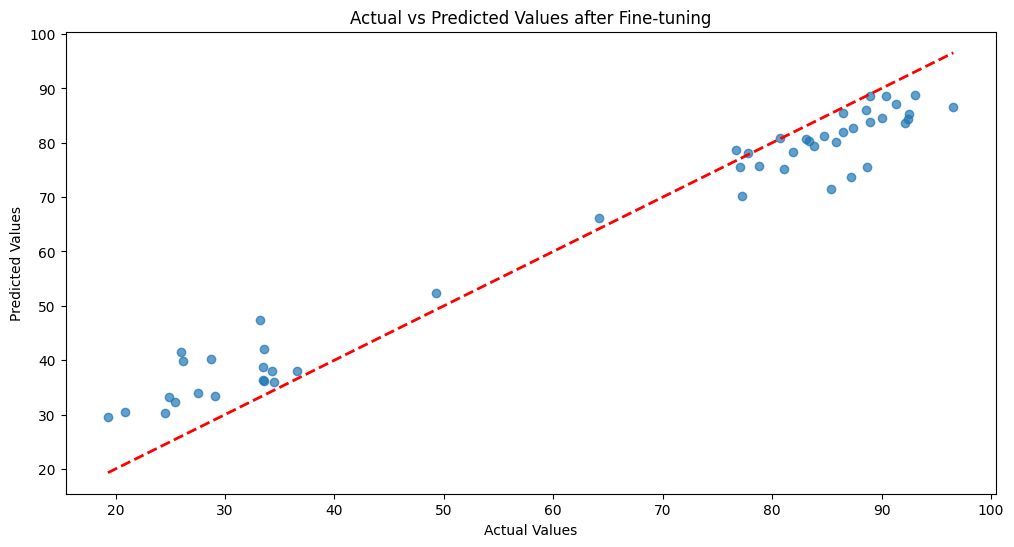

Fine-tuned model saved to /content/drive/MyDrive/reTesla chip/trained_vr_model_finetuned_2024-07-10_10-55-09.joblib
Evaluation results saved to /content/drive/MyDrive/reTesla chip/vr_model_finetuned_evaluation_results_2024-07-10_10-55-09.xlsx


In [20]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime

# 定义文件路径
model_file_path = '/content/drive/MyDrive/reTesla chip/trained_vr_model_2024-07-10_10-35-58.joblib'
data_file_path = '/content/drive/MyDrive/reTesla chip/total_v0708.xlsx'

# 加载模型
best_model = joblib.load(model_file_path)

# 读取数据
data = pd.read_excel(data_file_path)

# 定义特征和目标变量
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values
filenames = data['filename'].values

# 随机抽取400组数据
np.random.seed(42)  # 确保可复现性
random_indices = np.random.choice(len(X), 400, replace=False)
X_sample = X[random_indices]
y_sample = y[random_indices]
filenames_sample = filenames[random_indices]

# 使用模型进行预测
y_pred = best_model.predict(X_sample)

# 计算误差
errors = np.abs(y_sample - y_pred)

# 找出误差最大的前50个样本的索引
top_50_error_indices = np.argsort(errors)[-50:]

# 打印这些样本对应的文件名及其参数组合
print("Files with the largest prediction errors and their parameter combinations:")
columns = ['Filename', 'Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1', 'Actual', 'Predicted', 'Error']
error_samples = []
for idx in top_50_error_indices:
    error_samples.append([
        filenames_sample[idx],
        X_sample[idx][0], X_sample[idx][1], X_sample[idx][2],
        X_sample[idx][3], X_sample[idx][4], X_sample[idx][5],
        X_sample[idx][6], y_sample[idx], y_pred[idx], errors[idx]
    ])

# 创建DataFrame并打印
error_samples_df = pd.DataFrame(error_samples, columns=columns)
print(error_samples_df)

# 提取误差最大的前50个样本进行再训练
X_finetune = X_sample[top_50_error_indices]
y_finetune = y_sample[top_50_error_indices]

# 对模型进行微调
start_time = datetime.datetime.now()
best_model.fit(X_finetune, y_finetune)
end_time = datetime.datetime.now()

# 再次评估模型性能
y_pred_finetune = best_model.predict(X_finetune)
mse = mean_squared_error(y_finetune, y_pred_finetune)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_finetune, y_pred_finetune)
r2 = r2_score(y_finetune, y_pred_finetune)

print(f"MAE after fine-tuning: {mae}")
print(f"R-squared after fine-tuning: {r2}")
print(f"RMSE after fine-tuning: {rmse}")

# 保存微调后的模型
current_datetime = end_time.strftime("%Y-%m-%d_%H-%M-%S")
finetuned_model_file = f"/content/drive/MyDrive/reTesla chip/trained_vr_model_finetuned_{current_datetime}.joblib"
joblib.dump(best_model, finetuned_model_file)

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_finetune, y_pred_finetune, alpha=0.7)
plt.plot([y_finetune.min(), y_finetune.max()], [y_finetune.min(), y_finetune.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values after Fine-tuning')
plt.show()

# 创建评估结果 DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'R-squared', 'RMSE'],
    'Value': [mae, r2, rmse]
})

# 构建评估结果文件的完整路径
results_file = f"/content/drive/MyDrive/reTesla chip/vr_model_finetuned_evaluation_results_{current_datetime}.xlsx"
# 将评估结果保存到 Excel 表格
results.to_excel(results_file, index=False)

print(f"Fine-tuned model saved to {finetuned_model_file}")
print(f"Evaluation results saved to {results_file}")


Mean Absolute Error: 6.244358994230023


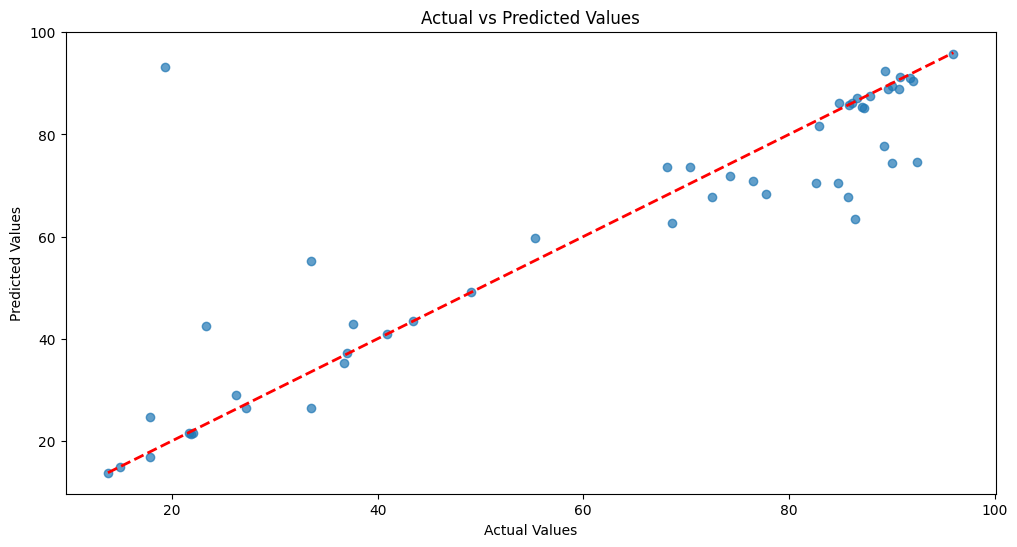

       Actual  Predicted
0   87.338785  85.094409
1   26.258440  29.059142
2   89.626728  88.953945
3   90.042709  89.481192
4   23.277726  42.445677
5   19.307044  93.284653
6   85.783151  67.748151
7   21.821456  21.266358
8   74.306326  71.777237
9   22.045784  21.564962
10  17.877711  24.679851
11  84.847814  86.135430
12  91.759640  90.961254
13  86.443179  63.419194
14  86.127965  86.135460
15  49.050381  49.228602
16  85.819521  85.785570
17  33.553114  55.260900
18  13.765728  13.785035
19  37.046089  37.274533
20  14.970596  14.852440
21  40.937146  40.884250
22  77.807556  68.366152
23  76.507887  70.861041
24  72.552685  67.698995
25  70.401364  73.655182
26  68.113864  73.563265
27  55.327374  59.672623
28  87.871274  87.619704
29  89.288118  77.715001
30  86.634236  87.080535
31  92.075628  90.531714
32  43.475109  43.392615
33  68.586633  62.689628
34  90.733798  88.835898
35  36.748982  35.298580
36  17.865076  16.815797
37  33.503258  26.474588
38  82.658228  70.521028


In [17]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 定义文件路径
model_file_path = '/content/drive/MyDrive/reTesla chip/trained_dt_model_2024-07-08_08-57-54.joblib' #trained_dt_model_2024-07-08_08-57-54.joblib这是最初的模型
data_file_path = '/content/drive/MyDrive/reTesla chip/total_v0708.xlsx'

# 加载模型
best_model = joblib.load(model_file_path)

# 读取数据
data = pd.read_excel(data_file_path)

# 定义特征和目标变量
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values

# 随机抽取50组数据
np.random.seed(42)  # 确保可复现性
random_indices = np.random.choice(len(X), 50, replace=False)
X_sample = X[random_indices]
y_sample = y[random_indices]

# 使用模型进行预测
y_pred = best_model.predict(X_sample)

# 计算平均误差
mae = mean_absolute_error(y_sample, y_pred)
print(f"Mean Absolute Error: {mae}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_sample, y_pred, alpha=0.7)
plt.plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 打印实际值和预测值对比
comparison_df = pd.DataFrame({'Actual': y_sample, 'Predicted': y_pred})
print(comparison_df)


Mean Absolute Error: 7.323881276054715


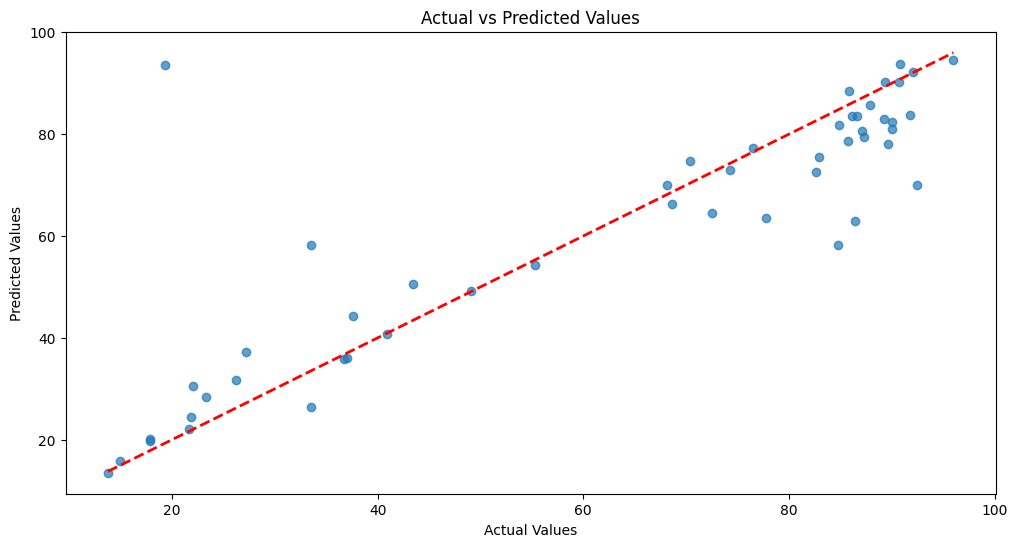

                                             Filename     Actual  Predicted
0   F:/comsol_0522_ncheng/image/u7_v_3500x1500/u7_...  87.338785  79.482079
1   F:/comsol_0522_ncheng/image/u3_v/u3_angle20_40...  26.258440  31.632072
2   F:/comsol_0522_ncheng/image/image_zuijia_24061...  89.626728  78.097187
3   F:/comsol_0522_ncheng/image/image_zuijia_24061...  90.042709  81.080432
4   F:/comsol_0522_ncheng/image/u9_v_4000x1500/u9_...  23.277726  28.321297
5   F:/comsol_0522_ncheng/image/u9_v_4000x1500/u9_...  19.307044  93.632536
6   F:/comsol_0522_ncheng/image/image_zuijia_24061...  85.783151  78.704468
7   F:/comsol_0522_ncheng/image/u3_v/u3_angle20_40...  21.821456  24.471981
8   F:/comsol_0522_ncheng/image/image_zuijia_24061...  74.306326  72.882368
9   F:/comsol_0522_ncheng/image/u3_v/u3_angle40_30...  22.045784  30.605195
10  F:/comsol_0522_ncheng/image/u1_v/u1_angle80_24...  17.877711  19.666694
11  F:/comsol_0522_ncheng/image/image_zuijia_24061...  84.847814  81.786437
12  F:/comso

In [18]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 定义文件路径
model_file_path = '/content/drive/MyDrive/reTesla chip/trained_vr_model_2024-07-10_10-35-58.joblib'
data_file_path = '/content/drive/MyDrive/reTesla chip/total_v0708.xlsx'

# 加载模型
best_model = joblib.load(model_file_path)

# 读取数据
data = pd.read_excel(data_file_path)

# 定义特征和目标变量
X = data[['Cycle', 'Theta', 'R1', 'L1', 'LL1', 'P1', 'H1']].values
y = data['Mixing Efficiency'].values
filenames = data['filename'].values

# 随机抽取50组数据
np.random.seed(42)  # 确保可复现性
random_indices = np.random.choice(len(X), 50, replace=False)
X_sample = X[random_indices]
y_sample = y[random_indices]
filenames_sample = filenames[random_indices]

# 使用模型进行预测
y_pred = best_model.predict(X_sample)

# 计算平均误差
mae = mean_absolute_error(y_sample, y_pred)
print(f"Mean Absolute Error: {mae}")

# 绘制实际值与预测值的散点图
plt.figure(figsize=(12, 6))
plt.scatter(y_sample, y_pred, alpha=0.7)
plt.plot([y_sample.min(), y_sample.max()], [y_sample.min(), y_sample.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# 打印实际值和预测值对比
comparison_df = pd.DataFrame({'Filename': filenames_sample, 'Actual': y_sample, 'Predicted': y_pred})
print(comparison_df)

# 计算每个样本的误差
errors = np.abs(y_sample - y_pred)

# 找出误差最大的前十个样本的索引
top_10_error_indices = np.argsort(errors)[-10:]

# 打印这些样本对应的文件名
print("\nFiles with the largest prediction errors:")
for idx in top_10_error_indices:
    print(filenames_sample[idx])


下面是给定目标输出,取预测出来的输入组合

In [ ]:
import numpy as np
import joblib
from scipy.optimize import differential_evolution

# 加载模型
model_path = "/content/drive/MyDrive/reTesla chip/trained_dt_model_2024-07-08_08-57-54.joblib"
model = joblib.load(model_path)

# 定义参数范围
cycle_values = [1, 3, 5, 7, 9]
theta_values = list(range(20, 81))  # 20到80度，包括20和80
r1_values = [round(x, 2) for x in np.arange(0.1, 0.31, 0.01)]
l1_values = [round(x, 2) for x in np.arange(0.1, 2.41, 0.01)]
ll1_values = [round(x, 2) for x in np.arange(0.05, 0.16, 0.01)]
p1_values = [round(x, 2) for x in np.arange(0.05, 0.36, 0.01)]
h1_values = [round(x, 2) for x in np.arange(0.05, 0.16, 0.01)]

# 定义目标输出
target_output = 95

def objective(params):
    cycle, theta, r1, l1, ll1, p1, h1 = params

    # 将连续值转换为离散值
    cycle = cycle_values[int(cycle)]
    theta = theta_values[int(theta)]
    r1 = r1_values[int(r1)]
    l1 = l1_values[int(l1)]
    ll1 = ll1_values[int(ll1)]
    p1 = p1_values[int(p1)]
    h1 = h1_values[int(h1)]

    input_data = np.array([[cycle, theta, r1, l1, ll1, p1, h1]])
    predicted_output = model.predict(input_data)[0]

    # 基础惩罚：预测输出与目标输出的差异
    penalty = abs(predicted_output - target_output)

    # 增加对cycle不为5或7的惩罚
    if cycle not in [5, 7]:
        penalty += 20  # 可以调整这个值来增加或减少对cycle的偏好强度

    return penalty

# 定义参数范围
bounds = [(0, len(cycle_values)-1),
          (0, len(theta_values)-1),
          (0, len(r1_values)-1),
          (0, len(l1_values)-1),
          (0, len(ll1_values)-1),
          (0, len(p1_values)-1),
          (0, len(h1_values)-1)]

# 运行优化
results = []
for _ in range(10):  # 运行10次以获得10个最佳组合
    result = differential_evolution(objective, bounds, maxiter=1000, popsize=50)

    # 将结果转换回实际参数值
    optimized_params = result.x
    cycle = cycle_values[int(optimized_params[0])]
    theta = theta_values[int(optimized_params[1])]
    r1 = r1_values[int(optimized_params[2])]
    l1 = l1_values[int(optimized_params[3])]
    ll1 = ll1_values[int(optimized_params[4])]
    p1 = p1_values[int(optimized_params[5])]
    h1 = h1_values[int(optimized_params[6])]

    # 预测混合效率
    predicted_efficiency = model.predict(np.array([[cycle, theta, r1, l1, ll1, p1, h1]]))[0]

    results.append((cycle, theta, r1, l1, ll1, p1, h1, predicted_efficiency))

# 按预测的混合效率排序结果
results.sort(key=lambda x: abs(x[7] - target_output))

# 打印结果
print("Top 10 most likely combinations for ~95% mixing efficiency:")
for i, (cycle, theta, r1, l1, ll1, p1, h1, efficiency) in enumerate(results[:10], 1):
    print(f"{i}. Cycle: {cycle}, Theta: {theta}, R1: {r1:.2f}, L1: {l1:.2f}, LL1: {ll1:.2f}, P1: {p1:.2f}, H1: {h1:.2f}")
    print(f"   Predicted Mixing Efficiency: {efficiency:.2f}%")
    print()

Top 10 most likely combinations for ~95% mixing efficiency:
1. Cycle: 5, Theta: 44, R1: 0.22, L1: 0.30, LL1: 0.06, P1: 0.29, H1: 0.06
   Predicted Mixing Efficiency: 95.14%

2. Cycle: 5, Theta: 44, R1: 0.22, L1: 0.77, LL1: 0.05, P1: 0.24, H1: 0.08
   Predicted Mixing Efficiency: 95.14%

3. Cycle: 5, Theta: 39, R1: 0.19, L1: 0.36, LL1: 0.06, P1: 0.34, H1: 0.10
   Predicted Mixing Efficiency: 95.14%

4. Cycle: 5, Theta: 39, R1: 0.21, L1: 0.71, LL1: 0.06, P1: 0.23, H1: 0.12
   Predicted Mixing Efficiency: 95.14%

5. Cycle: 5, Theta: 39, R1: 0.18, L1: 0.88, LL1: 0.05, P1: 0.29, H1: 0.08
   Predicted Mixing Efficiency: 95.14%

6. Cycle: 5, Theta: 45, R1: 0.18, L1: 0.76, LL1: 0.05, P1: 0.24, H1: 0.06
   Predicted Mixing Efficiency: 95.14%

7. Cycle: 5, Theta: 38, R1: 0.21, L1: 0.84, LL1: 0.07, P1: 0.33, H1: 0.09
   Predicted Mixing Efficiency: 95.14%

8. Cycle: 5, Theta: 33, R1: 0.21, L1: 0.43, LL1: 0.05, P1: 0.21, H1: 0.08
   Predicted Mixing Efficiency: 95.14%

9. Cycle: 5, Theta: 34, R1: 

In [59]:
import numpy as np
import joblib
from scipy.optimize import differential_evolution

# 加载模型
model_path = "/content/drive/MyDrive/reTesla chip/trained_dt_model_2024-07-08_08-57-54.joblib"
model = joblib.load(model_path)

# 定义参数范围
cycle_values = [1, 3, 5, 7, 9]
theta_values = list(range(20, 81))  # 20到80度，包括20和80
r1_values = [round(x, 2) for x in np.arange(0.1, 0.31, 0.01)]
l1_values = [round(x, 2) for x in np.arange(0.1, 2.41, 0.01)]
ll1_values = [round(x, 2) for x in np.arange(0.05, 0.16, 0.01)]
p1_values = [round(x, 2) for x in np.arange(0.05, 0.36, 0.01)]
h1_values = [round(x, 2) for x in np.arange(0.05, 0.16, 0.01)]

# 定义目标输出
target_output = 96

def objective(params):
    cycle, theta, r1, l1, ll1, p1, h1 = params

    # 将连续值转换为离散值
    cycle = cycle_values[int(cycle)]
    theta = theta_values[int(theta)]
    r1 = r1_values[int(r1)]
    l1 = l1_values[int(l1)]
    ll1 = ll1_values[int(ll1)]
    p1 = p1_values[int(p1)]
    h1 = h1_values[int(h1)]

    input_data = np.array([[cycle, theta, r1, l1, ll1, p1, h1]])
    predicted_output = model.predict(input_data)[0]

    # 基础惩罚：预测输出与目标输出的差异
    penalty = abs(predicted_output - target_output)

    # 增加对cycle不为5或7的惩罚
    if cycle not in [7]:
        penalty += 30  # 可以调整这个值来增加或减少对cycle的偏好强度

    return penalty

# 定义参数范围
bounds = [(0, len(cycle_values)-1),
          (0, len(theta_values)-1),
          (0, len(r1_values)-1),
          (0, len(l1_values)-1),
          (0, len(ll1_values)-1),
          (0, len(p1_values)-1),
          (0, len(h1_values)-1)]

# 运行优化
results = []
for _ in range(10):  # 运行10次以获得10个最佳组合
    result = differential_evolution(objective, bounds, maxiter=1000, popsize=50)

    # 将结果转换回实际参数值
    optimized_params = result.x
    cycle = cycle_values[int(optimized_params[0])]
    theta = theta_values[int(optimized_params[1])]
    r1 = r1_values[int(optimized_params[2])]
    l1 = l1_values[int(optimized_params[3])]
    ll1 = ll1_values[int(optimized_params[4])]
    p1 = p1_values[int(optimized_params[5])]
    h1 = h1_values[int(optimized_params[6])]

    # 预测混合效率
    predicted_efficiency = model.predict(np.array([[cycle, theta, r1, l1, ll1, p1, h1]]))[0]

    results.append((cycle, theta, r1, l1, ll1, p1, h1, predicted_efficiency))

# 按预测的混合效率排序结果
results.sort(key=lambda x: abs(x[7] - target_output))

# 打印结果
print("Top 10 most likely combinations for ~95% mixing efficiency:")
for i, (cycle, theta, r1, l1, ll1, p1, h1, efficiency) in enumerate(results[:10], 1):
    print(f"{i}. Cycle: {cycle}, Theta: {theta}, R1: {r1:.2f}, L1: {l1:.2f}, LL1: {ll1:.2f}, P1: {p1:.2f}, H1: {h1:.2f}")
    print(f"   Predicted Mixing Efficiency: {efficiency:.2f}%")
    print()

Top 10 most likely combinations for ~95% mixing efficiency:
1. Cycle: 7, Theta: 33, R1: 0.29, L1: 2.03, LL1: 0.07, P1: 0.30, H1: 0.07
   Predicted Mixing Efficiency: 95.62%

2. Cycle: 7, Theta: 38, R1: 0.28, L1: 0.82, LL1: 0.07, P1: 0.31, H1: 0.07
   Predicted Mixing Efficiency: 95.62%

3. Cycle: 7, Theta: 34, R1: 0.29, L1: 0.24, LL1: 0.06, P1: 0.31, H1: 0.05
   Predicted Mixing Efficiency: 95.62%

4. Cycle: 7, Theta: 39, R1: 0.28, L1: 2.21, LL1: 0.05, P1: 0.30, H1: 0.05
   Predicted Mixing Efficiency: 95.62%

5. Cycle: 7, Theta: 33, R1: 0.29, L1: 1.23, LL1: 0.07, P1: 0.31, H1: 0.06
   Predicted Mixing Efficiency: 95.62%

6. Cycle: 7, Theta: 32, R1: 0.29, L1: 1.46, LL1: 0.07, P1: 0.32, H1: 0.05
   Predicted Mixing Efficiency: 95.62%

7. Cycle: 7, Theta: 40, R1: 0.29, L1: 1.89, LL1: 0.06, P1: 0.34, H1: 0.07
   Predicted Mixing Efficiency: 95.62%

8. Cycle: 7, Theta: 35, R1: 0.29, L1: 0.10, LL1: 0.06, P1: 0.33, H1: 0.06
   Predicted Mixing Efficiency: 95.62%

9. Cycle: 7, Theta: 38, R1: 

In [ ]:
import numpy as np
import skopt
from keras.models import load_model
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

# 加载训练好的模型
model = load_model('/content/drive/MyDrive/reTesla chip/test_model/trained_model_2024-07-08_newest.keras')

# 目标输出值
target_output = 96

# 定义变量的范围限制
cycle_values = [1, 3, 5, 7, 9]
theta_values = list(range(20, 81))  # 20到80度，包括20和80
r1_values = [round(x, 2) for x in np.arange(0.1, 0.31, 0.01)]
l1_values = [round(x, 2) for x in np.arange(0.1, 2.41, 0.01)]
ll1_values = [round(x, 2) for x in np.arange(0.05, 0.16, 0.01)]
p1_values = [round(x, 2) for x in np.arange(0.05, 0.36, 0.01)]
h1_values = [round(x, 2) for x in np.arange(0.05, 0.16, 0.01)]

# 定义参数搜索空间
space = [
    Categorical(cycle_values, name='cycle'),
    Categorical(theta_values, name='theta'),
    Categorical(r1_values, name='r1'),
    Categorical(l1_values, name='l1'),
    Categorical(ll1_values, name='ll1'),
    Categorical(p1_values, name='p1'),
    Categorical(h1_values, name='h1')
]

# 定义目标函数
def objective(cycle, theta, r1, l1, ll1, p1, h1):
    input_data = np.array([[cycle, theta, r1, l1, ll1, p1, h1]])
    predicted_output = model.predict(input_data)[0][0]

    # 基础惩罚：预测输出与目标输出的差异
    penalty = abs(predicted_output - target_output)

    # 增加对cycle不为5或7的惩罚
    if cycle not in [5, 7]:
        penalty += 20  # 可以调整这个值来增加或减少对cycle的偏好强度

    return penalty

# 运行贝叶斯优化
result = gp_minimize(objective, space, n_calls=200, random_state=42)

# 获取最优参数组合
best_params = dict(zip(['cycle', 'theta', 'r1', 'l1', 'll1', 'p1', 'h1'], result.x))

# 打印排名靠前的5种参数组合及其预测输出
print("Top 5 Recommended Input Parameter Combinations:")
for idx, params in enumerate(result.x_iters[:5]):
    input_data = np.array([params])
    predicted_output = model.predict(input_data)[0][0]
    print(f"Combination {idx + 1}: {dict(zip(['cycle', 'theta', 'r1', 'l1', 'll1', 'p1', 'h1'], params))}, Predicted Mixing Efficiency: {predicted_output:.2f}")

# 打印最佳组合
print("\nBest Combination:")
best_input = np.array([result.x])
best_predicted_output = model.predict(best_input)[0][0]
print(f"Parameters: {best_params}")
print(f"Predicted Mixing Efficiency: {best_predicted_output:.2f}")
print(f"Difference from target: {abs(best_predicted_output - target_output):.2f}")

1/1 [==============================] - 0s 32ms/step


KeyboardInterrupt: 

In [ ]:
pip install deap

In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
from keras.models import load_model

# 加载训练好的模型
model = load_model('/content/drive/MyDrive/reTesla chip/trained_model_2024-07-08.keras')

# 目标输出值
target_output = 96

# 定义变量的范围限制
cycle_values = [1, 3, 5, 7, 9]
theta_values = [20, 40, 50, 60, 70, 80]
r1_values = [0.1, 0.15, 0.2, 0.25, 0.3]
l1_values = np.arange(0.1, 2.4, 0.2).tolist()
ll1_values = [0.05, 0.1, 0.15]
p1_values = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
h1_values = [0.05, 0.1, 0.15]

def repair_individual(individual):
    individual[0] = min(cycle_values, key=lambda x: abs(x - individual[0]))
    individual[1] = min(theta_values, key=lambda x: abs(x - individual[1]))
    individual[2] = min(r1_values, key=lambda x: abs(x - individual[2]))
    individual[3] = max(min(individual[3], max(l1_values)), min(l1_values))
    individual[4] = min(ll1_values, key=lambda x: abs(x - individual[4]))
    individual[5] = min(p1_values, key=lambda x: abs(x - individual[5]))
    individual[6] = min(h1_values, key=lambda x: abs(x - individual[6]))
    return individual

# 定义适应度和个体
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# 定义个体生成函数
def generate_individual():
    return [
        random.choice(cycle_values),
        random.choice(theta_values),
        random.choice(r1_values),
        random.choice(l1_values),
        random.choice(ll1_values),
        random.choice(p1_values),
        random.choice(h1_values)
    ]

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 定义适应度函数
def evaluate(individual):
    input_data = np.array(individual).reshape(1, -1)
    predicted = model.predict(input_data)[0][0]
    return (abs(predicted - target_output),)

# 注册交叉和变异操作，并修正个体
def mate_and_repair(ind1, ind2):
    tools.cxBlend(ind1, ind2, alpha=0.5)
    repair_individual(ind1)
    repair_individual(ind2)
    return ind1, ind2

def mutate_and_repair(ind):
    tools.mutGaussian(ind, mu=0, sigma=1, indpb=0.5)
    repair_individual(ind)
    return ind,

toolbox.register("mate", mate_and_repair)
toolbox.register("mutate", mutate_and_repair)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# 遗传算法参数
population_size = 200  # 增加初始种群大小
crossover_probability = 0.7
mutation_probability = 0.3  # 提高变异概率
generations = 100  # 增加世代数

# 生成初始种群
population = toolbox.population(n=population_size)

# 运行遗传算法
result_population, logbook = algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability, ngen=generations, verbose=False)

# 获取最优个体
best_individuals = tools.selBest(result_population, k=5)
print("Top 5 Recommended Input Parameter Combinations:")
for idx, ind in enumerate(best_individuals):
    input_data = np.array(ind).reshape(1, -1)
    predicted = model.predict(input_data)[0][0]
    print(f"Combination {idx + 1}: {ind}, Predicted Mixing Efficiency: {predicted:.2f}")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 43ms/step
Top 5 Recommended Input Parameter Combinations:
1/1 [==============================] - 0s 46ms/step
Combination 1: [9, 50, 0.15, 2.2962698096828715, 0.05, 0.35, 0.05], Predicted Mixing Efficiency: 95.00
1/1 [==============================] - 0s 38ms/step
Combination 2: [9, 50, 0.15, 2.2962697388885456, 0.05, 0.35, 0.05], Predicted Mixing Efficiency: 95.00
1/1 [==============================] - 0s 33ms/step
Combination 3: [9, 50, 0.15, 2.296269735384135, 0.05, 0.35, 0.05], Predicted Mixing Efficiency: 95.00
1/1 [==============================] - 0s 38ms/step
Combination 4: [9, 50, 0.15, 2.296269740817802, 0.05, 0.35, 0.05], Predicted Mixing Efficiency: 95.00
1/1 [==============================] - 0s 28ms/step
Combination 5: [9, 50, 0.15, 2.2962696961359605, 0.05, 0.35, 0.05], Predicted Mixing Efficiency: 95.00


In [ ]:
pip install scikit-optimize